In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split

from sklearn.tree import DecisionTreeClassifier

from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score

from sklearn.preprocessing import KBinsDiscretizer
from sklearn.compose import ColumnTransformer

In [ ]:
df = pd.read_csv('/content/archive (14).zip',usecols=['Age','Fare','Survived'])


In [ ]:
df.dropna(inplace=True)
df.shape
df.head()


,Survived,Age,Fare
0,0,34.5,7.8292
1,1,47.0,7.0000
2,0,62.0,9.6875
3,0,27.0,8.6625
4,1,22.0,12.2875


In [ ]:
X = df.iloc[:,1:]
y = df.iloc[:,0]
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)
X_train.head(2)


,Age,Fare
281,0.75,13.775
96,76.00,78.850


In [ ]:
clf = DecisionTreeClassifier()
clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)
accuracy_score(y_test,y_pred)


0.5671641791044776

In [ ]:

np.mean(cross_val_score(DecisionTreeClassifier(),X,y,cv=10,scoring='accuracy'))


0.5590017825311943

In [ ]:
kbin_age = KBinsDiscretizer(n_bins=15,encode='ordinal',strategy='quantile')
kbin_fare = KBinsDiscretizer(n_bins=15,encode='ordinal',strategy='quantile')


In [ ]:
trf = ColumnTransformer([
    ('first',kbin_age,[0]),
    ('second',kbin_fare,[1])
])
X_train_trf = trf.fit_transform(X_train)
X_test_trf = trf.transform(X_test)
trf.named_transformers_['first'].bin_edges_

array([array([ 0.33      , 13.53333333, 18.        , 20.        , 22.        ,
              24.        , 25.2       , 27.73333333, 30.        , 32.        ,
              36.        , 39.        , 43.8       , 47.93333333, 55.        ,
              76.        ])                                                   ],
      dtype=object)

In [ ]:

trf.named_transformers_['first'].bin_edges_

array([array([ 0.33      , 13.53333333, 18.        , 20.        , 22.        ,
              24.        , 25.2       , 27.73333333, 30.        , 32.        ,
              36.        , 39.        , 43.8       , 47.93333333, 55.        ,
              76.        ])                                                   ],
      dtype=object)

In [ ]:
output = pd.DataFrame({
    'age':X_train['Age'],
    'age_trf':X_train_trf[:,0],
    'fare':X_train['Fare'],
    'fare_trf':X_train_trf[:,1]
})
output['age_labels'] = pd.cut(x=X_train['Age'],
                                    bins=trf.named_transformers_['first'].bin_edges_[0].tolist())
output['fare_labels'] = pd.cut(x=X_train['Fare'],
                                    bins=trf.named_transformers_['second'].bin_edges_[0].tolist())
output.sample(5)


,age,age_trf,fare,fare_trf,age_labels,fare_labels
73,28.5,7.0,27.7208,10.0,"(27.733, 30.0]","(26.0, 27.721]"
349,31.0,8.0,21.0000,8.0,"(30.0, 32.0]","(14.891, 21.0]"
336,32.0,9.0,13.0000,6.0,"(30.0, 32.0]","(12.253, 13.0]"
327,46.0,12.0,79.2000,13.0,"(43.8, 47.933]","(78.679, 141.325]"
348,24.0,5.0,13.5000,6.0,"(22.0, 24.0]","(13.0, 14.891]"


In [ ]:
clf = DecisionTreeClassifier()
clf.fit(X_train_trf,y_train)
y_pred2 = clf.predict(X_test_trf)
accuracy_score(y_test,y_pred2)


0.5970149253731343

In [ ]:
X_trf = trf.fit_transform(X)
np.mean(cross_val_score(DecisionTreeClassifier(),X,y,cv=10,scoring='accuracy'))


0.5651515151515151

In [ ]:
def discretize(bins,strategy):
    kbin_age = KBinsDiscretizer(n_bins=bins,encode='ordinal',strategy=strategy)
    kbin_fare = KBinsDiscretizer(n_bins=bins,encode='ordinal',strategy=strategy)
    
    trf = ColumnTransformer([
        ('first',kbin_age,[0]),
        ('second',kbin_fare,[1])
    ])
    
    X_trf = trf.fit_transform(X)
    print(np.mean(cross_val_score(DecisionTreeClassifier(),X,y,cv=10,scoring='accuracy')))
    
    plt.figure(figsize=(14,4))
    plt.subplot(121)
    plt.hist(X['Age'])
    plt.title("Before")

    plt.subplot(122)
    plt.hist(X_trf[:,0],color='red')
    plt.title("After")

    plt.show()
    
    plt.figure(figsize=(14,4))
    plt.subplot(121)
    plt.hist(X['Fare'])
    plt.title("Before")

    plt.subplot(122)
    plt.hist(X_trf[:,1],color='red')
    plt.title("Fare")

    plt.show()
    


0.5680926916221034


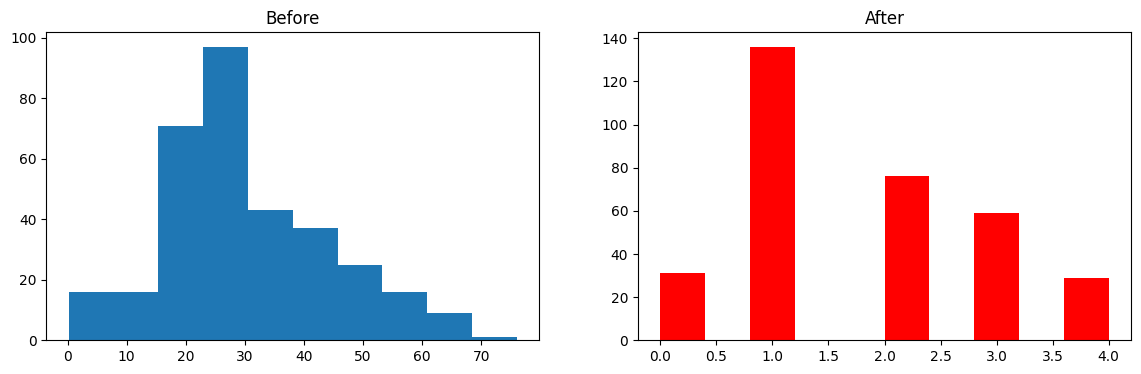

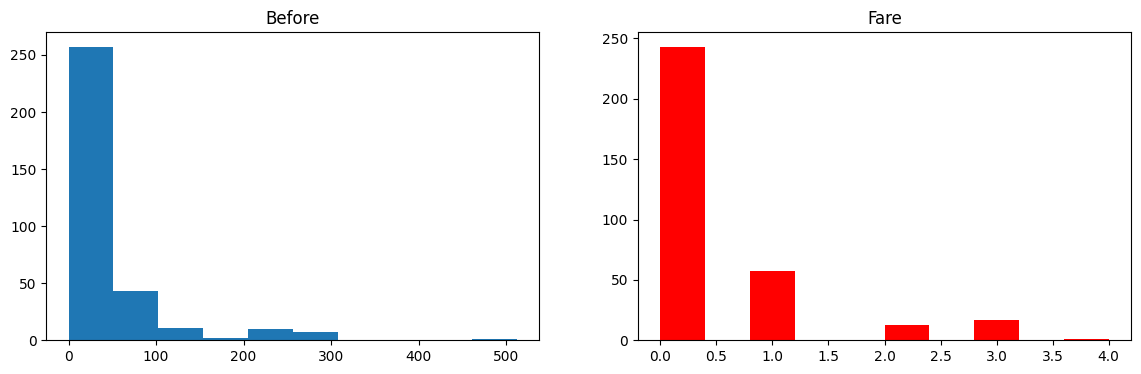

In [ ]:

discretize(5,'kmeans')
